In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/train.csv')

In [5]:
df.columns

Index([u'Music', u'Slow songs or fast songs', u'Dance', u'Folk', u'Country',
       u'Classical music', u'Musical', u'Pop', u'Rock', u'Metal or Hardrock',
       ...
       u'Life struggles', u'Happiness in life', u'Energy levels',
       u'Small - big dogs', u'Personality', u'Finding lost valuables',
       u'Getting up', u'Interests or hobbies', u'Parents' advice',
       u'Questionnaires or polls'],
      dtype='object', length=117)

In [14]:
music = df.iloc[:,:19]
movies = df.iloc[:,19:31]
interests = df.iloc[:,31:63]
personality = df.iloc[:,63:]

In [15]:
data = {'music':music,'movies':movies,'interests':interests,'personality':personality}

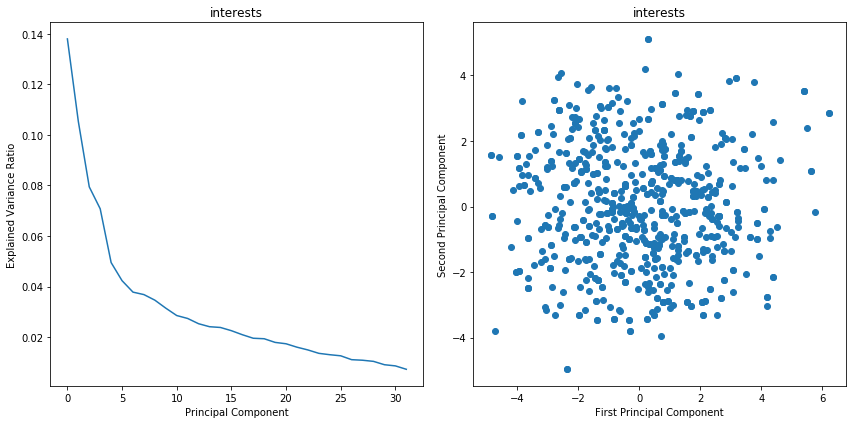

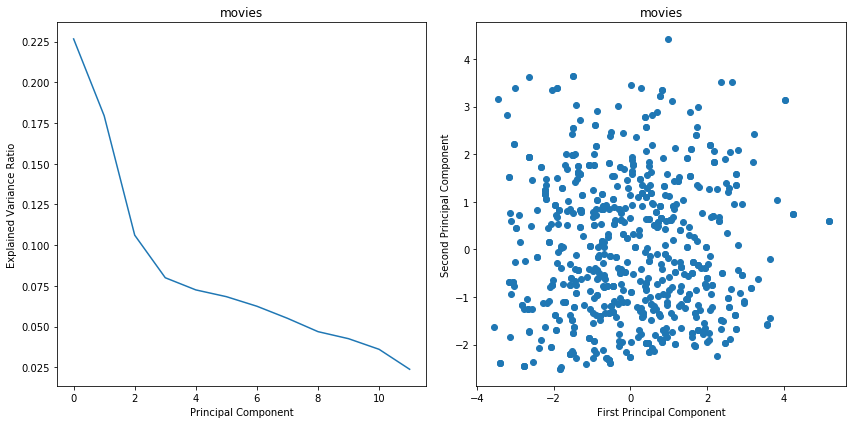

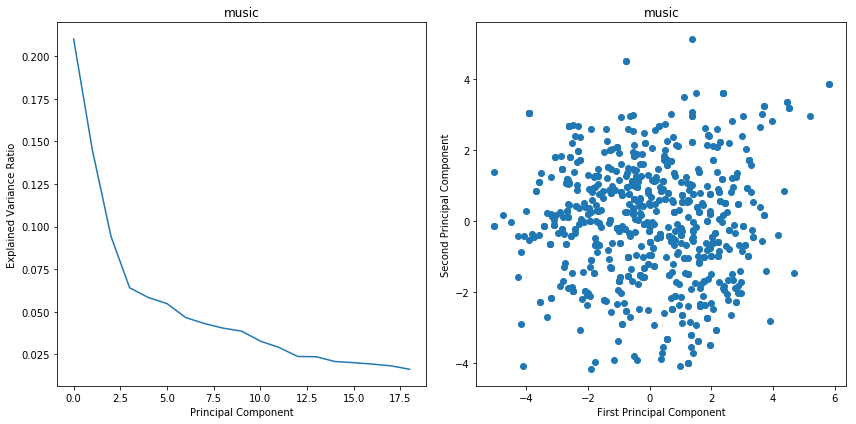

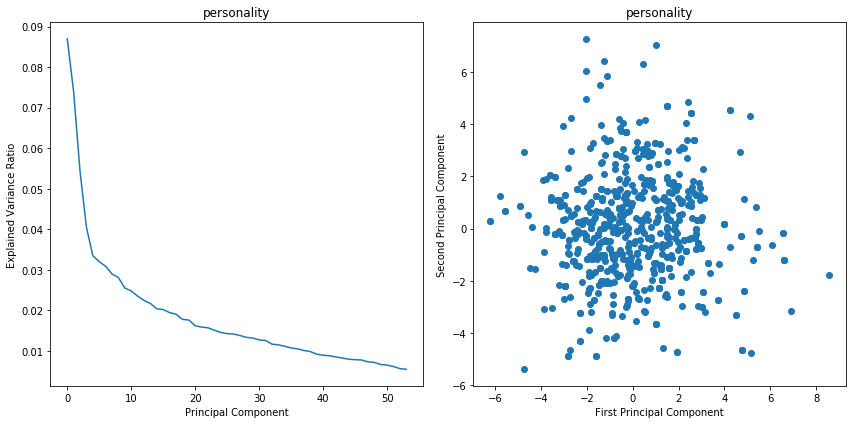

In [16]:
for k in data.keys():
    scaled = scale(data[k])
    pca = PCA()
    pca.fit(scaled)
    projected = pca.fit_transform(scaled)
    plt.figure(figsize=(12,6)) 
    plt.subplot(1, 2, 1)
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(k)
    plt.subplot(1, 2, 2)
    plt.scatter(projected[:,0],projected[:,1])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(k)
    plt.tight_layout()
    plt.show()

## Correlations

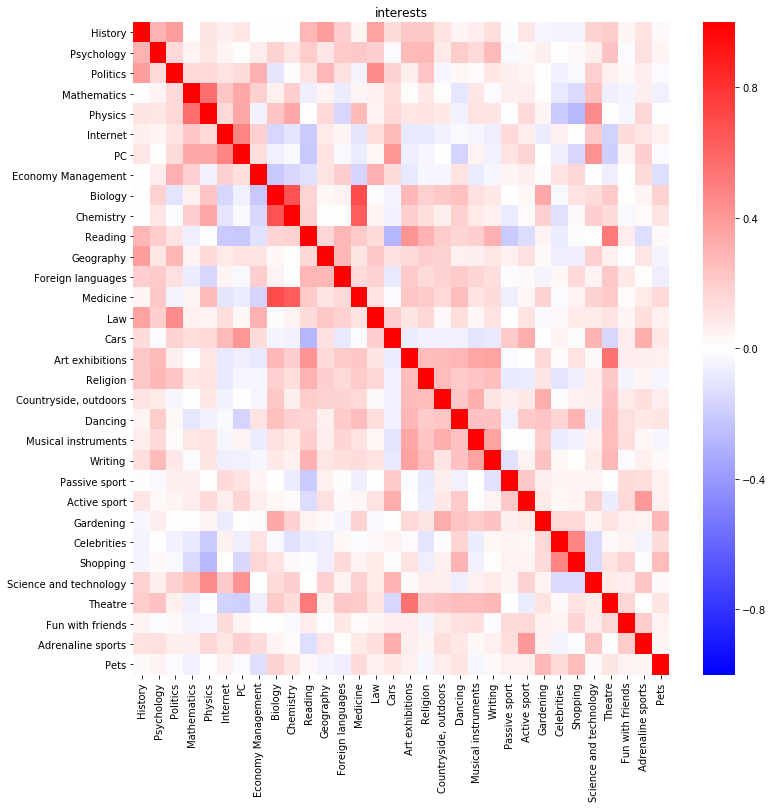

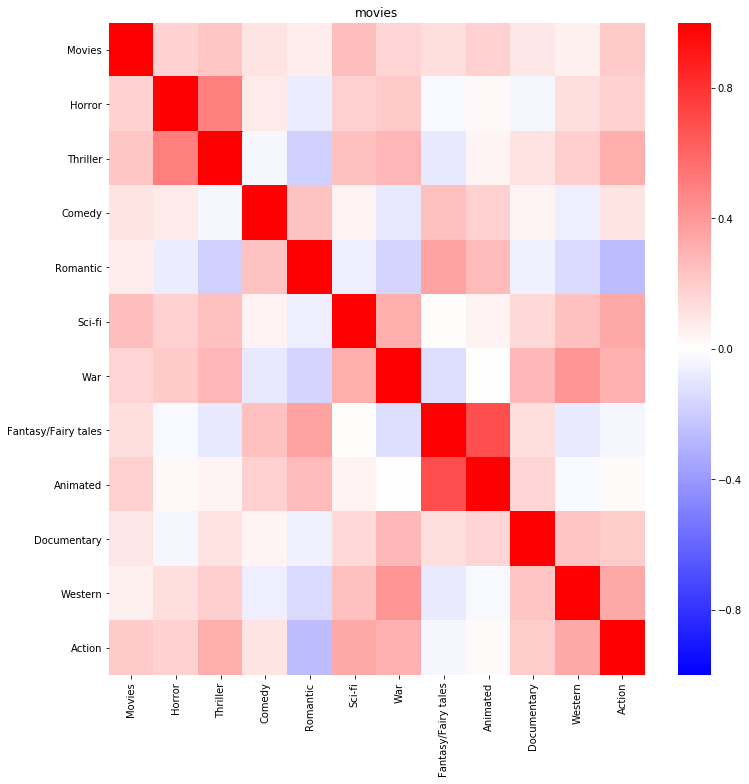

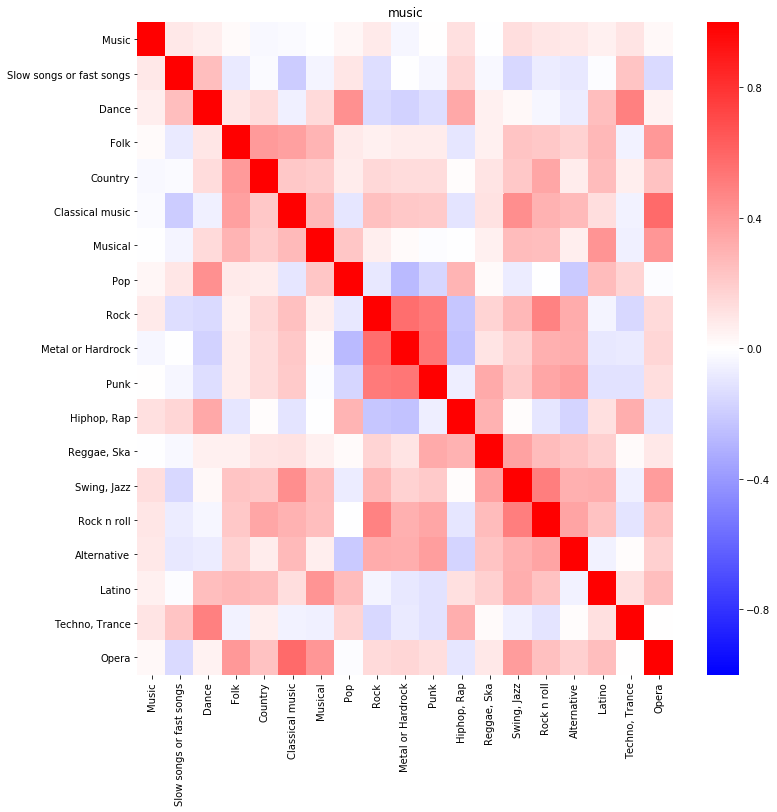

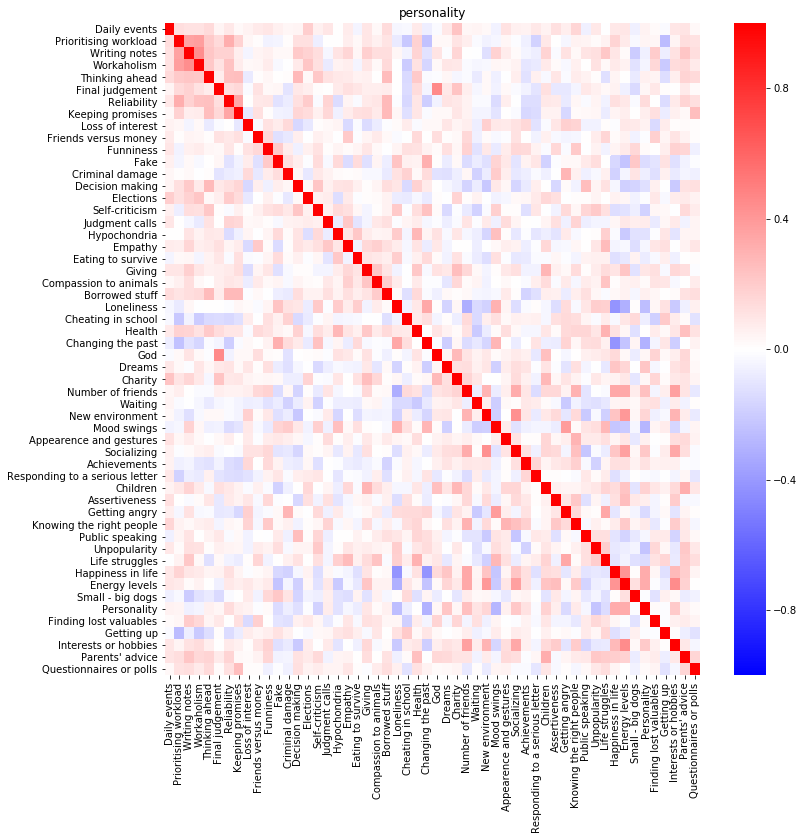

In [52]:
for k in data.keys():

    plt.figure(figsize=(12,12))
    set_ = data[k]
    sns.heatmap(set_.corr() , vmin= -1 , vmax = 1 , cmap = 'bwr', xticklabels=set_.columns , yticklabels=set_.columns)
    plt.title(k)
    plt.show()


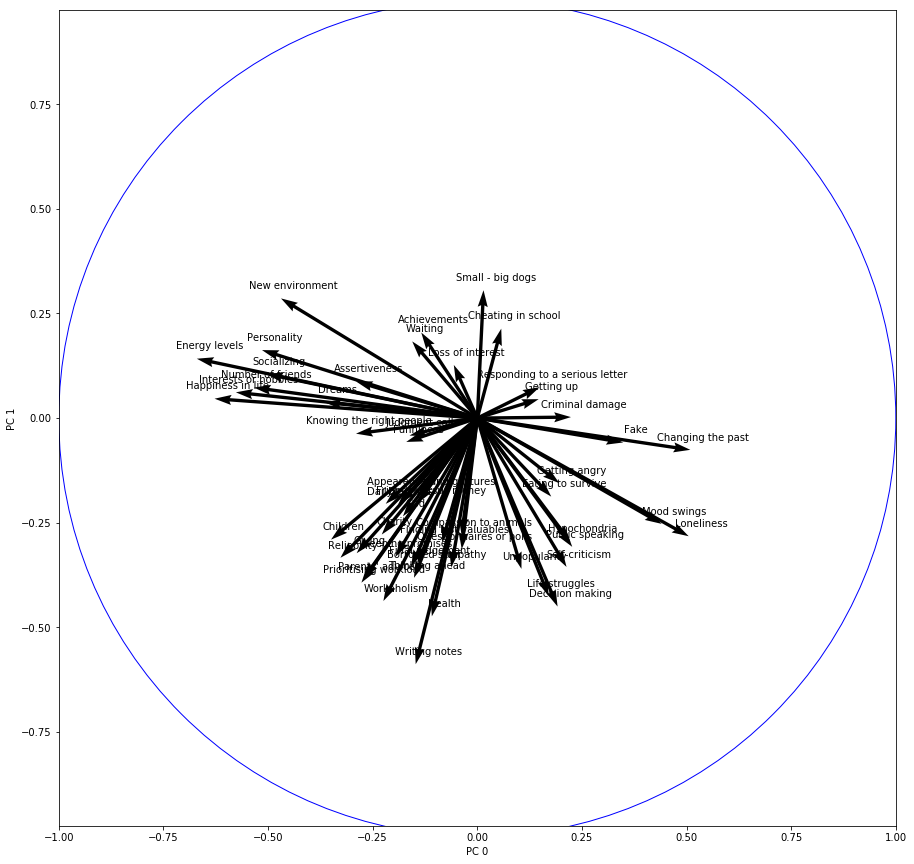

In [130]:
PCs = pca.components_
k = 54

dim1 = []
dim2 = []

for var in range(k):
    dim1.append(np.corrcoef(projected[:,0] ,  personality.iloc[:,var])[0,1])
    dim2.append(np.corrcoef(projected[:,1] ,  personality.iloc[:,var])[0,1])


# Use quiver to generate the basic plot
fig = plt.figure(figsize=(15,15))

plt.quiver(np.zeros(PCs.shape[1] - ( PCs.shape[1] - k ) ), np.zeros(PCs.shape[1] - ( PCs.shape[1] - k ) ),
           dim1, dim2, 
           angles='xy', scale_units='xy',scale = 1 , width = .004)

# plt.quiver(np.zeros(PCs.shape[1] - ( PCs.shape[1] - k ) ), np.zeros(PCs.shape[1] - ( PCs.shape[1] - k ) ),
#            PCs[0,:k], PCs[1,:k], 
#            angles='xy', scale_units='xy',scale = 1 , width = .004, color = 'blue')




# Add labels based on feature names (here just numbers)
feature_names = personality.columns[:k]
for i,j,z in zip(np.array(dim2) + 0.03, np.array(dim1)+0.03, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# Done
plt.show()